# Preprocessing Spain's Energy Data for Time Series Modeling

## Prepare Notebook

**Read in libraries**

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import warnings

**Set Notebook Preferences**

In [96]:
#Set Pandas preferenes
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100

#Set style for matplotlib
plt.style.use('seaborn-deep')

#Surpress annoying warnings
warnings.filterwarnings('ignore')

#Set path to save visualizations created in this notebook
viz_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\02_Data_Processing'

#Set path to read in visuals from EDA
eda_path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Visualizations\01_Exploratory_Data_Analysis'

**Read in data**

In [97]:
#Set path to data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\02_Cleaned_Data'

#Read in file
df = pd.read_csv(path + '/2020_0620_Weather_Energy.csv', index_col=0)

**Preview Data**

In [98]:
print('Data shape:',df.shape)
display(df.head())

Data shape: (35070, 17)


,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,generation other,generation other renewable,generation solar,generation waste,generation wind onshore,price actual,temp,total load actual
date_time,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,43.0,73.0,49.0,196.0,6378.0,65.41,30.814633,25385.0
2015-01-01 01:00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,43.0,71.0,50.0,195.0,5890.0,64.92,30.852860,24382.0
2015-01-01 02:00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,43.0,73.0,50.0,196.0,5461.0,64.48,30.108448,22734.0
2015-01-01 03:00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,43.0,75.0,50.0,191.0,5238.0,59.32,30.091044,21286.0
2015-01-01 04:00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,43.0,74.0,42.0,189.0,4935.0,56.04,30.192620,20264.0


## Correlation Matrix

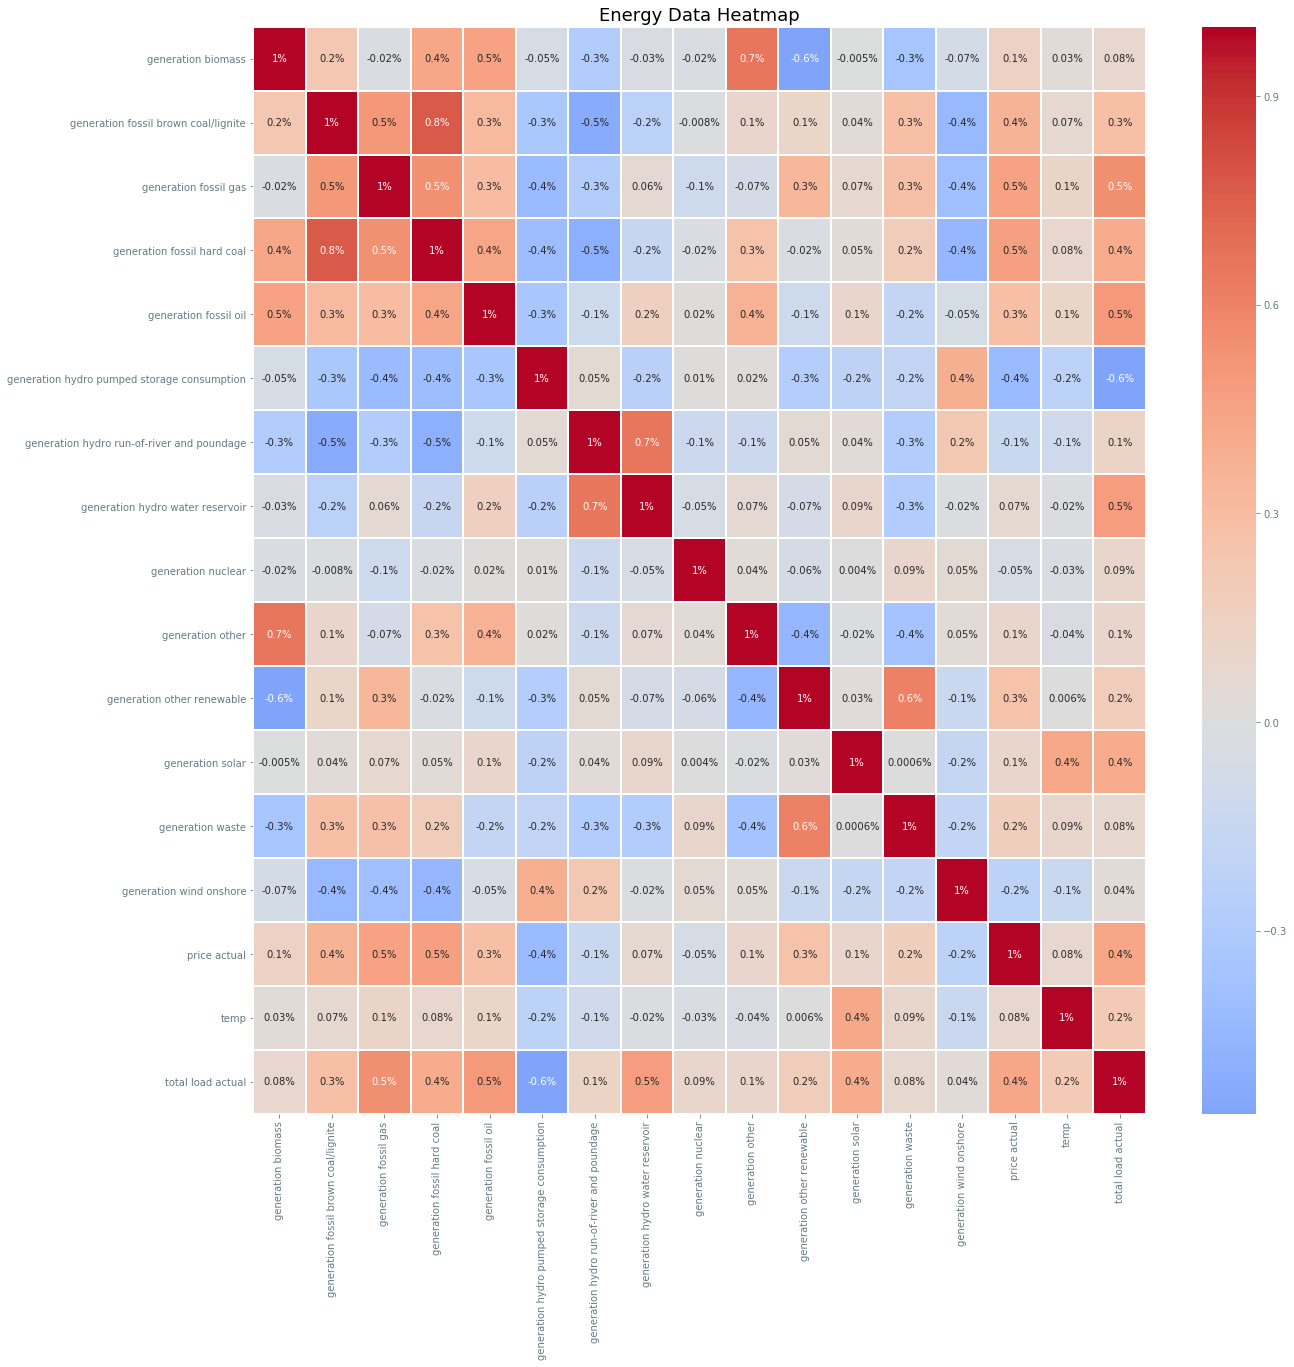

In [99]:
Image(filename= eda_path + '/Correlation_Matrix.png', height=1300, width=1300)

**Dropping cols with <.4 and >-.4 correlation with target**

In [100]:
#Create corr
corr = df.corr()

#Capture features with a strong corr w/ target
features = corr['price actual'][(corr['price actual'] < -.4 )| (corr['price actual'] > .4 )].index
df = df[features]

#Check
df.head()

,generation fossil gas,generation fossil hard coal,generation hydro pumped storage consumption,price actual,total load actual
date_time,,,,,
2015-01-01 00:00:00,4844.0,4821.0,863.0,65.41,25385.0
2015-01-01 01:00:00,5196.0,4755.0,920.0,64.92,24382.0
2015-01-01 02:00:00,4857.0,4581.0,1164.0,64.48,22734.0
2015-01-01 03:00:00,4314.0,4131.0,1503.0,59.32,21286.0
2015-01-01 04:00:00,4130.0,3840.0,1826.0,56.04,20264.0


## Check for Stationarity

**ADF and KPSS Test**

In [101]:
#Read in ADF and KPSS tests
from Time_Series_Tests import ADF_KPSS_test

#Apply tests to each timeseries in data 
for col in df.columns:
    print('Results for {}\n'.format(str.title(col)))
    ADF_KPSS_test(df[col],0)

Results for Generation Fossil Gas

ADF Statistic: -15.910326623139463
P-Value: 8.137551035859094e-29
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 7.625443267890463
P-Value: 0.01
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Fossil Hard Coal

ADF Statistic: -13.778650326867808
P-Value: 9.386176742015581e-26
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 3.9033266065493906
P-Value: 0.01
Critical Values 10% : 0.347
Critical Values 5% : 0.463
Critical Values 2.5% : 0.574
Critical Values 1% : 0.739

Results for Generation Hydro Pumped Storage Consumption

ADF Statistic: -20.33280740135735
P-Value: 0.0
Critical Values 1% : -3.4305
Critical Values 5% : -2.8616
Critical Values 10% : -2.5668
KPSS Statistic: 3.2729674345560573
P-Value: 0.01
Critical Values 10% : 0.347
Critical Values 5% : 0.463

**Check Autocorrelation Plots**

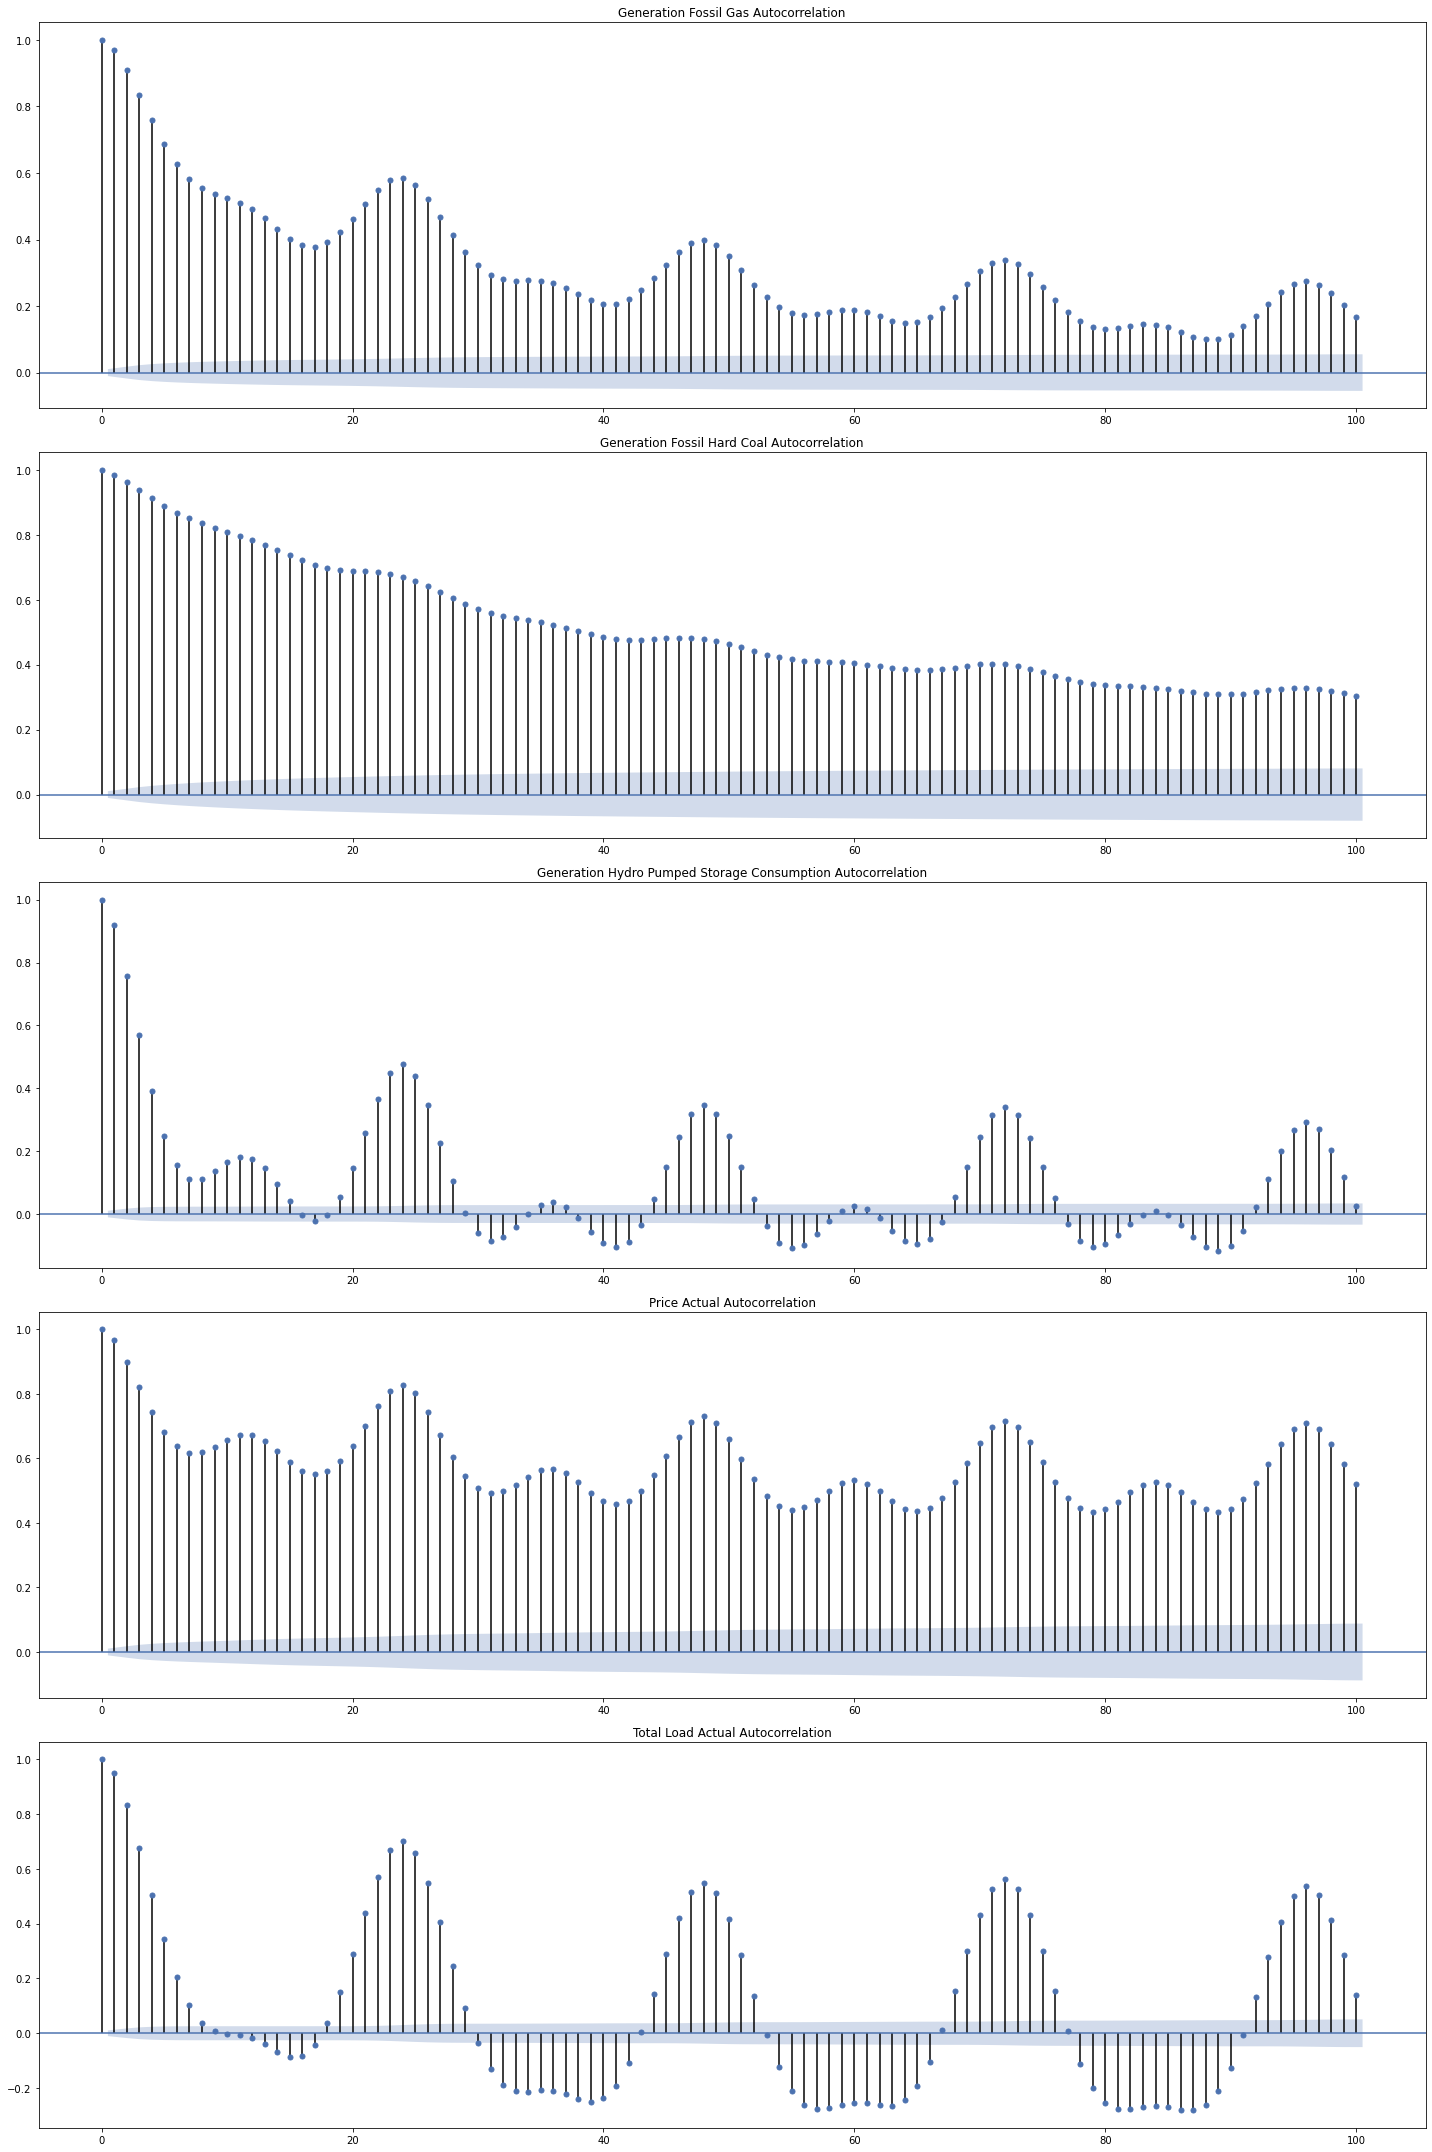

In [102]:
#Read in ACF and PACF PLots
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (20,30))

#PLot ACF
for col, ax in zip(df.columns, axes.flat):
    plot_acf(df[col], lags = 100, ax = ax, title = str.title(col) + ' Autocorrelation')
    plt.tight_layout()


**Split data into training and test sets**

In [103]:
#Set cutoff to split data 85% train and 15% test
cutoff = round(len(df) *.85)

#Split data
X_train = df[:cutoff]
X_test = df[cutoff:]

#Check
print('Training data shape{} Test data shape: {}'.format(X_train.shape,X_test.shape))

Training data shape(29810, 5) Test data shape: (5260, 5)


**Apply first order differencing to training data**

In [104]:
#Loop appends a differenced col to X_train
for col in X_train.columns:
    X_train[col +' differenced'] = X_train[col] - X_train[col].shift(-1)

#Sort cols and dropna
X_train = X_train.reindex(sorted(X_train.columns), axis=1)
X_train.dropna(inplace=True)

#Check
display(X_train.head())

,generation fossil gas,generation fossil gas differenced,generation fossil hard coal,generation fossil hard coal differenced,generation hydro pumped storage consumption,generation hydro pumped storage consumption differenced,price actual,price actual differenced,total load actual,total load actual differenced
date_time,,,,,,,,,,
2015-01-01 00:00:00,4844.0,-352.0,4821.0,66.0,863.0,-57.0,65.41,0.49,25385.0,1003.0
2015-01-01 01:00:00,5196.0,339.0,4755.0,174.0,920.0,-244.0,64.92,0.44,24382.0,1648.0
2015-01-01 02:00:00,4857.0,543.0,4581.0,450.0,1164.0,-339.0,64.48,5.16,22734.0,1448.0
2015-01-01 03:00:00,4314.0,184.0,4131.0,291.0,1503.0,-323.0,59.32,3.28,21286.0,1022.0
2015-01-01 04:00:00,4130.0,92.0,3840.0,250.0,1826.0,-283.0,56.04,2.41,20264.0,359.0


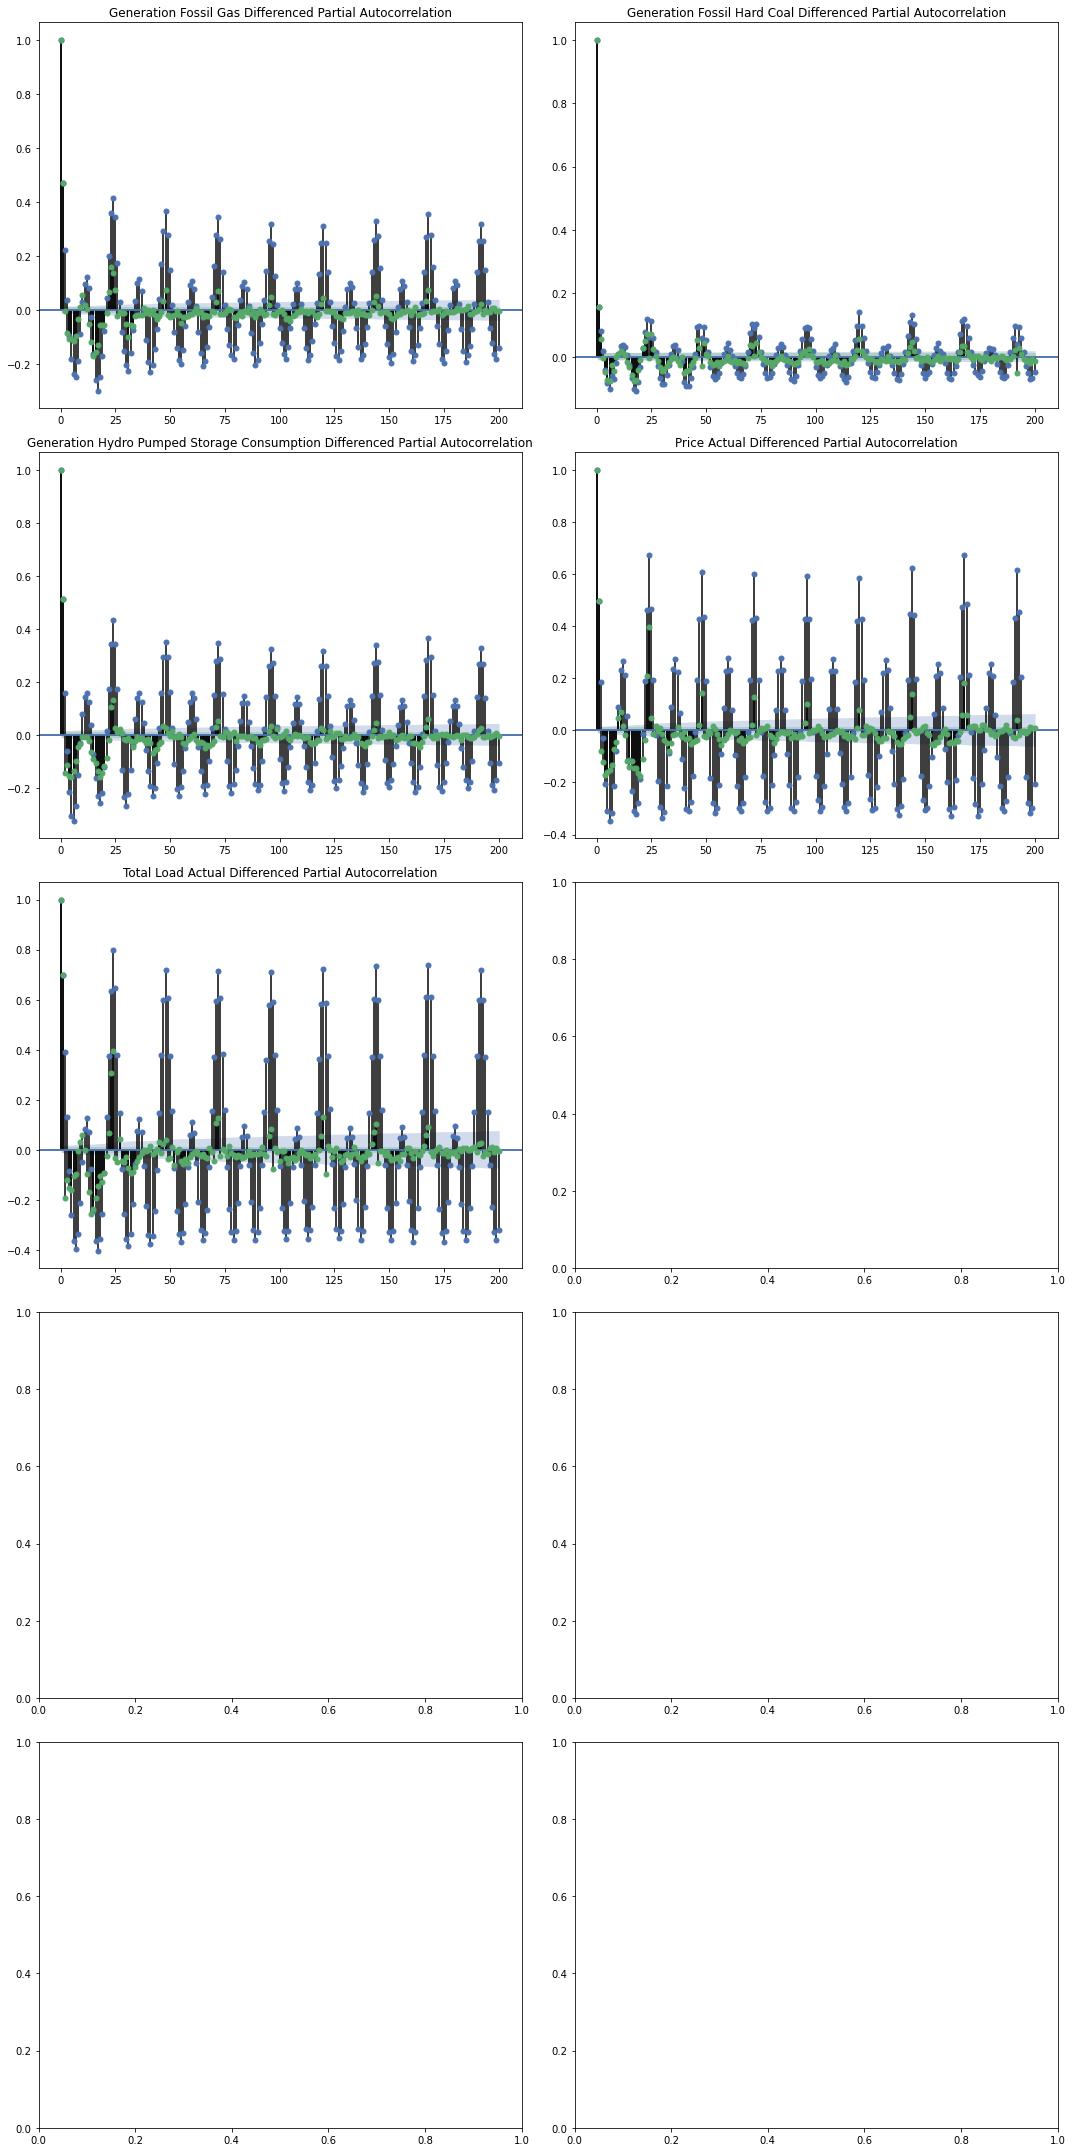

In [122]:
#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (15,30))

#PLot ACF
for col, ax in zip(X_train.filter(regex = 'diff').columns, axes.flatten()):
    plot_acf(X_train[col], lags = 200, ax = ax, title = str.title(col) + ' Autocorrelation')
    plt.tight_layout()



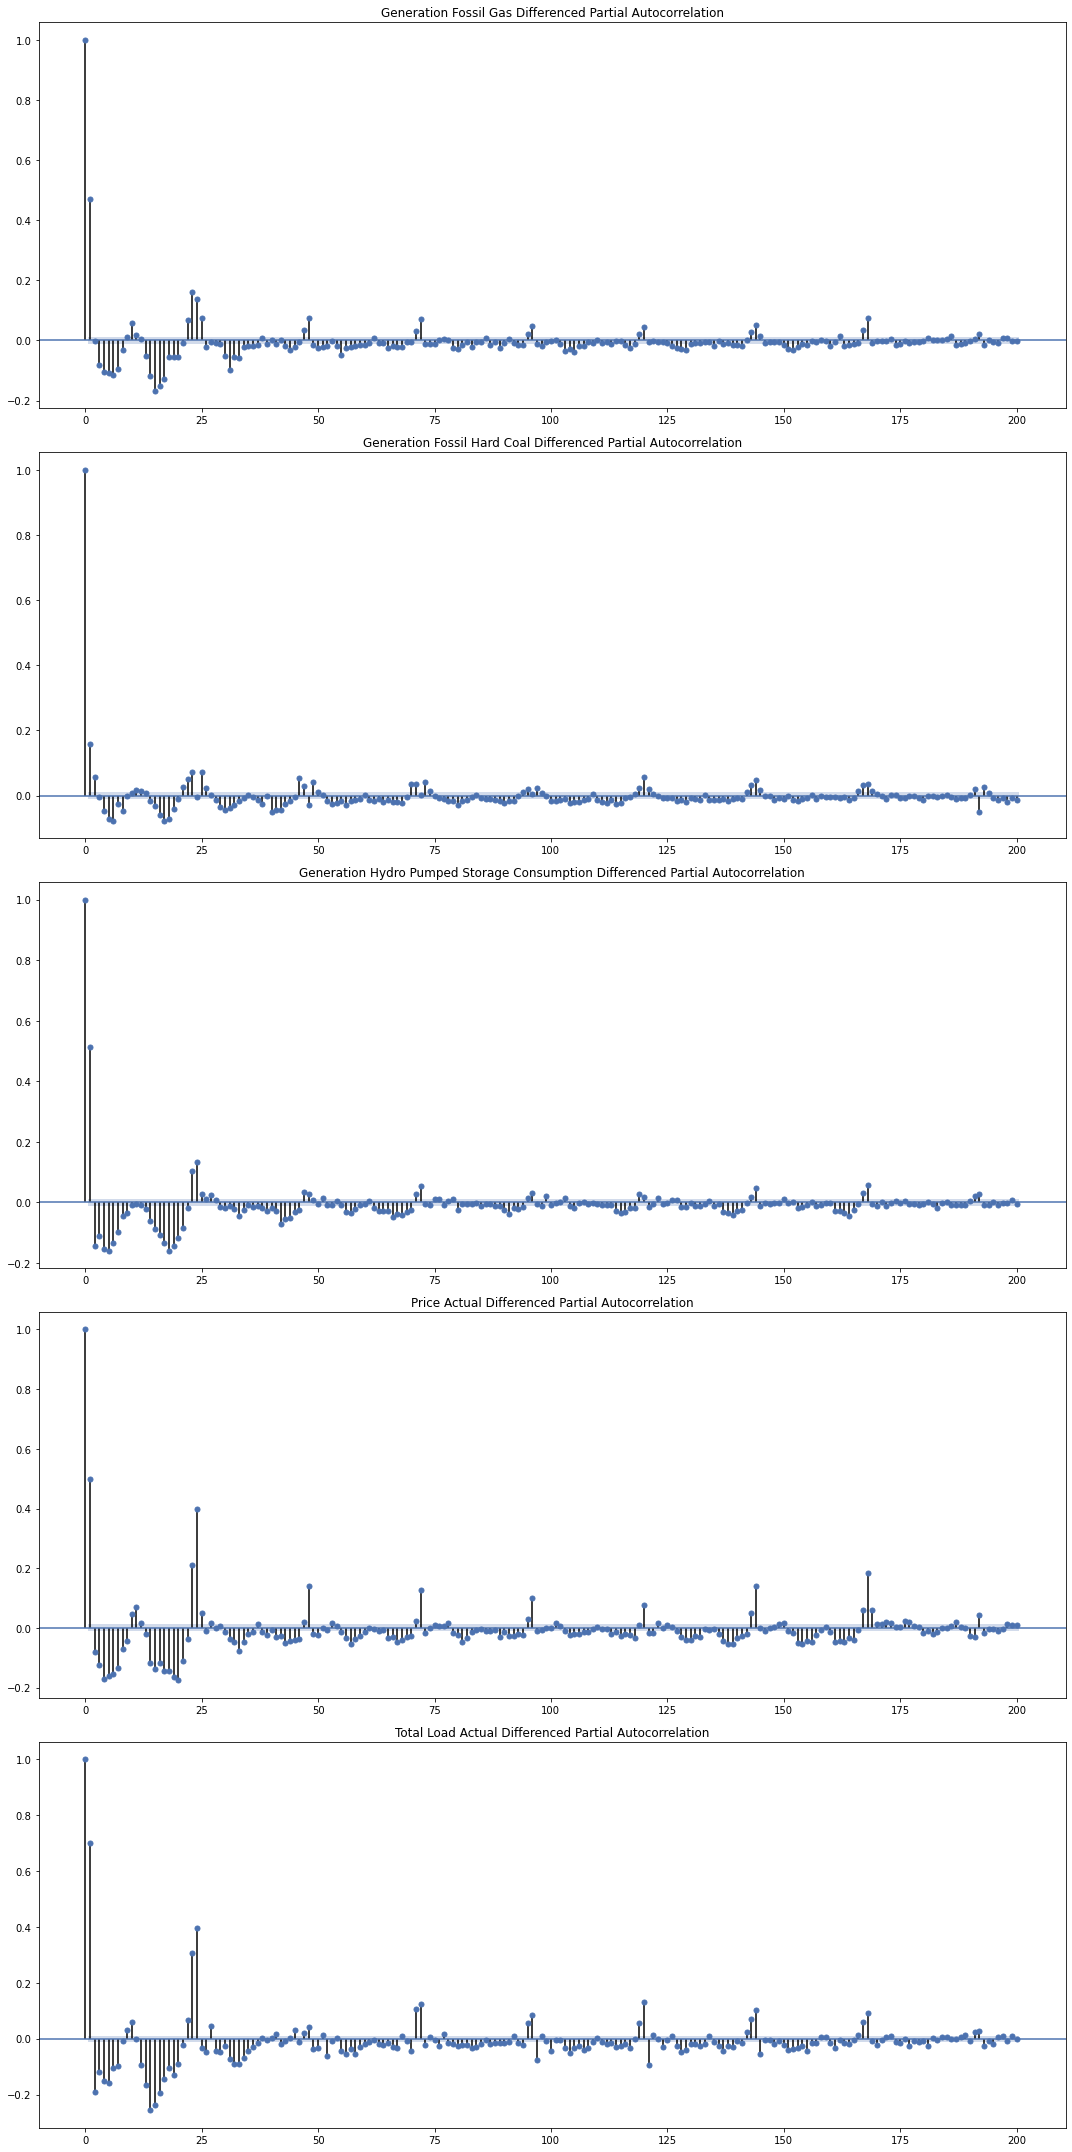

In [123]:
#Create figure
f, axes = plt.subplots(len(df.columns),1, figsize = (15,30))

#PLot PACF
for col, ax in zip(X_train.filter(regex = 'diff').columns, axes.flatten()):
    plot_pacf(X_train[col], lags = 200, ax = ax, title = str.title(col) + ' Partial Autocorrelation')
    plt.tight_layout()


# Export Data

In [107]:
#Set path location to write file
path = r'\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather\Data\03_Processed_Data'

#Write df
X_train.to_csv(path + '/2020_0624_Training_Data.csv')
X_test.to_csv(path + '/2020_0624_Test_Data.csv')